# Merge the geocoded EUC and the mobility dataframe

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
euc = pd.read_csv("../datasets/EUC_geocoded_clean.csv")
mob = pd.read_excel("../datasets/Student_Mobility_2013-14.xlsx")

KeyboardInterrupt: 

In [ ]:
# Select only the students that are SMS mobility type
mob = mob[mob.MobilityType == "Mob-SMS"]

In [ ]:
# Select only the columns which need to be used
mob = mob[["ParticipantGender", "SendingPartnerErasmusID", "HostingPartnerErasmusID"]]

In [ ]:
merge = mob.merge(euc, left_on="SendingPartnerErasmusID", right_on="Institutional code", how="inner")

In [ ]:
merge = merge.merge(euc, left_on="HostingPartnerErasmusID", right_on="Institutional code", how="inner", 
                    suffixes={"Sending", "Hosting"})

In [ ]:
print("Lost {:0.3f}% in the merging.".format((100 - (len(merge) / len(mob))*100)))

In [ ]:
cmerge = merge[["CountryHosting", "CountrySending" ,"coordinatesHosting", "coordinatesSending", "ParticipantGender"]].copy()

In [ ]:
cmerge.coordinatesHosting = cmerge.coordinatesHosting.str.strip("()").str.split(",")
cmerge.coordinatesSending = cmerge.coordinatesSending.str.strip("()").str.split(",")

In [ ]:
cmerge["latHosting"] = cmerge.coordinatesHosting.apply(lambda x: float(x[0]))
cmerge["lonHosting"] = cmerge.coordinatesHosting.apply(lambda x: float(x[1]))
cmerge["latSending"] = cmerge.coordinatesSending.apply(lambda x: float(x[0]))
cmerge["lonSending"] = cmerge.coordinatesSending.apply(lambda x: float(x[1]))

In [ ]:
from geopy import distance

cmerge['km'] = cmerge.apply(lambda row: distance.distance(
        (row["latHosting"], row["lonHosting"]), (row["latSending"], row["lonSending"])).km, axis=1
)

In [ ]:
prod = cmerge[["CountryHosting", "CountrySending","coordinatesSending", "coordinatesHosting", "km", "ParticipantGender"]]

In [48]:
prod.to_csv("../checkpoints/02_corrected/data_submission/final_datasets/geocodedMobility.csv")

In [16]:
cmerge = cmerge.drop(columns=["coordinatesHosting", "coordinatesSending"])

In [200]:
cmerge.to_csv("finished_questions/travel_distance/distance_raw.csv", index=False)

In [17]:
production = cmerge.copy()

In [18]:
production = production[["CountrySending", "km"]]

In [217]:
from matplotlib import cm

In [219]:
cm.jet(len)

(0.0, 0.0, 0.517825311942959, 1.0)

In [18]:
gb = prod.groupby(by="CountrySending").mean().sort_values(by="km")

In [19]:
gb 

km
CountrySending             
CH               761.182466
AT               923.554227
HR               953.885824
LI               969.681368
NL              1005.217117
DE              1048.100477
SI              1063.016421
BE              1075.506918
FR              1075.932036
DK              1106.314311
SK              1111.844049
CZ              1119.052804
LU              1129.545559
UK              1132.992601
HU              1144.777799
IT              1208.395820
IE              1308.428659
SE              1389.009390
BG              1501.376927
NO              1511.555240
LV              1559.487650
GR              1580.435895
RO              1590.589537
ES              1597.217212
PL              1597.965153
EE              1623.957316
LT              1651.139840
MT              1772.650258
PT              1868.821828
TR              1903.350142
FI              1929.270996
CY              2493.756771
IS              2525.261575

In [226]:
cols = []
for i in range(len(gb)):
    cols.append(cm.jet(i))

In [21]:
mean = production.groupby(by="CountrySending").mean()

In [22]:
std = production.groupby(by="CountrySending").std()

In [27]:
mean["std"] = std.km

In [31]:
mean.rename(columns={"km": "km_distance", "std": "km_deviation"}).to_csv("../datasets/country_distance.csv", index=True)

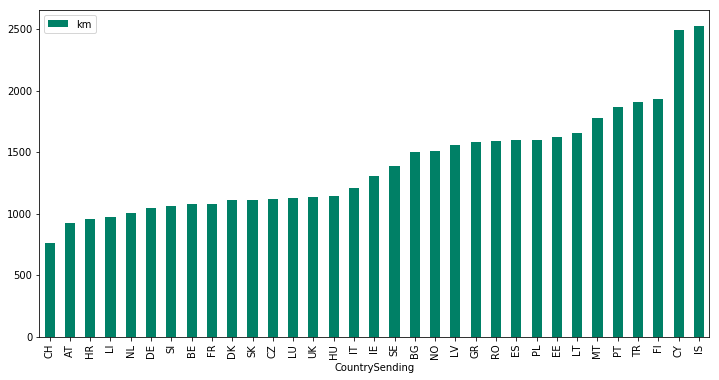

In [240]:
fig, ax = plt.subplots(figsize=(12, 6))
production.groupby(by="CountrySending").mean().sort_values(by="km").plot(kind="bar", ax=ax, colormap='summer')

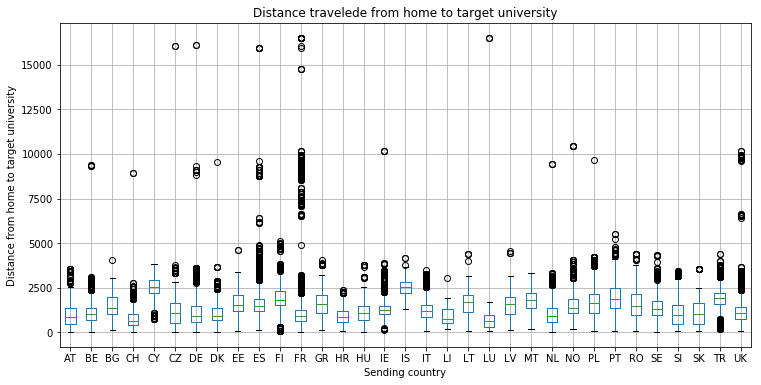

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
prod.boxplot(column="km", by="CountrySending", ax=ax)
fig.suptitle('')
ax.set_title("Distance travelede from home to target university")
ax.set_xlabel("Sending country")
ax.set_ylabel("Distance from home to target university")
plt.show()

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv("../checkpoints/02_corrected/data_submission/final_datasets/geocodedMobility.csv")

In [17]:
df.sort_values(by="km")

Number CountryHosting CountrySending  \
194533  194533             AT             HU   
194534  194534             AT             HU   
156887  156887             HU             AT   
206738  206738             AT             HU   
204535  204535             DE             FR   
...        ...            ...            ...   
163525  163525             LU             FR   
163526  163526             LU             FR   
163527  163527             LU             FR   
160944  160944             FR             DE   
160945  160945             FR             DE   

                          coordinatesSending  \
194533          ['47.680273', ' 16.5771423']   
194534          ['47.680273', ' 16.5771423']   
156887         ['47.8294118', ' 16.5350525']   
206738          ['47.680273', ' 16.5771423']   
204535  ['48.5790692', ' 7.766454499999999']   
...                                      ...   
163525       ['-22.2631296', ' 166.4031554']   
163526       ['-22.2631296', ' 166.4031554']   
163527       ['-22.2631296', ' 166.4031554']   
160944           ['47.689426', ' 9.1868777']   
160945           ['47.689426', ' 9.1868777']   

                         coordinatesHosting            km ParticipantGender  
194533        ['47.8294118', ' 16.5350525']     16.879708                 F  
194534        ['47.8294118', ' 16.5350525']     16.879708                 F  
156887         ['47.680273', ' 16.5771423']     16.879708                 M  
206738        ['47.8295268', ' 16.5337338']     16.911019                 F  
204535  ['48.458828', ' 7.942094999999999']     18.631605                 M  
...                                     ...           ...               ...  
163525           ['49.504254', ' 5.948386']  16532.130364                 F  
163526           ['49.504254', ' 5.948386']  16532.130364                 F  
163527           ['49.504254', ' 5.948386']  16532.130364                 F  
160944      ['-22.2631296', ' 166.4031554']  16534.164957                 F  
160945      ['-22.2631296', ' 166.4031554']  16534.164957                 M  

[207790 rows x 7 columns]

In [15]:
df[df.CountrySending == "SK"]

Number CountryHosting CountrySending  \
88          88             NO             SK   
89          89             NO             SK   
90          90             NO             SK   
91          91             NO             SK   
92          92             NO             SK   
...        ...            ...            ...   
207673  207673             PL             SK   
207674  207674             PL             SK   
207675  207675             BG             SK   
207676  207676             CZ             SK   
207679  207679             FR             SK   

                          coordinatesSending  \
88             ['48.1257816', ' 17.1332155']   
89             ['48.1257816', ' 17.1332155']   
90      ['48.14174939999999', ' 17.1074531']   
91             ['49.2040671', ' 18.7548664']   
92             ['49.2040671', ' 18.7548664']   
...                                      ...   
207673         ['49.0793883', ' 19.2992225']   
207674         ['49.0793883', ' 19.2992225']   
207675          ['48.5723721', ' 19.117315']   
207676  ['48.15911130000001', ' 17.1635265']   
207679   ['48.84714719999999', ' 17.232719']   

                          coordinatesHosting           km ParticipantGender  
88       ['59.13876190000001', ' 9.6721566']  1319.408743                 M  
89       ['59.13876190000001', ' 9.6721566']  1319.408743                 F  
90       ['59.13876190000001', ' 9.6721566']  1317.106651                 F  
91       ['59.13876190000001', ' 9.6721566']  1252.269986                 M  
92       ['59.13876190000001', ' 9.6721566']  1252.269986                 M  
...                                      ...          ...               ...  
207673         ['50.0625819', ' 19.9488975']   119.019872                 F  
207674         ['50.8102127', ' 19.1162443']   192.963417                 M  
207675         ['42.6537179', ' 23.3586361']   736.035706                 M  
207676         ['50.0581617', ' 14.4323923']   290.421640                 F  
207679  ['45.2047438', ' 5.737802200000001']   961.787203                 M  

[2529 rows x 7 columns]